# **Varsha** **Jaiswal**

# **Prediction** **using** **Supervised** **ML** 

**Predict** **the** **percentage** **of** **an student based on the no. of study hours.**

**Simple Linear Regression**

This is a simple linear regression task as it involves just two variables.





**Loading the Required libabries**

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

***Know we are going to read the data file and going to perfom some function on the data to know the insights of the data ***


In [2]:

dataset=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")

In [3]:
dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
dataset.shape

(25, 2)

In [5]:
dataset.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Visualization of the two varibale or column**

**Bivariate Analysis**

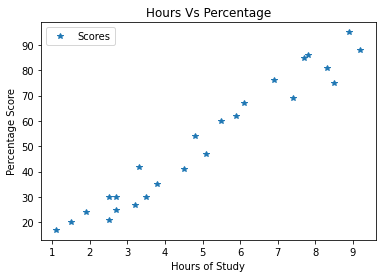

In [8]:
dataset.plot(x="Hours",y="Scores",style="*")
plt.title('Hours Vs Percentage')
plt.xlabel('Hours of Study')
plt.ylabel('Percentage Score')
plt.show()

As we can see that the graph show the increasing order which means that as hours of study incresses the Score will also increase

**Preparing the data(Preprocessing the data to fit into the model)**

In [9]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

The attributes are stored in the X variable. We specified "-1" as the range for columns since we wanted our attribute set to contain all the columns except the last one, which is "Scores". Similarly the y variable we specified 1 since the index for "Scores" column is 1.



**Splitting the data using Scikit-Learn's built-in train_test_split() method**

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
X_train.shape

(20, 1)

In [14]:
X_test.shape

(5, 1)

In [15]:
Y_train.shape

(20,)

In [16]:
Y_test.shape

(5,)

**The final step is fit the data into the model**

**Training the model**

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
print(regressor.coef_)

[9.91065648]


This represents that for every unit cahnge in the hours of study there is 9.91% of increase in the Score

**Making the prediction** 

In [19]:
y_pred=regressor.predict(X_test)

**Let's comapre the actual value and the predicted value**

In [20]:
df=pd.DataFrame({"Actual": Y_test, "Predicted": y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Though our model is not very precise, the predicted percentages are close to the actual ones.

**Evaluting the model by the Error values**

In [36]:
from sklearn import metrics
print("Mean Absolute Error Value",metrics.mean_absolute_error(Y_test,y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))


Mean Absolute Error Value 4.183859899002982
Mean Squared Error: 21.598769307217456


As we can see that the value of mean absolute error is 4.18, which is very less so this means that our algorithm did a decent job.

mean Squared erroe shows for certain prediction the actual and predicte value have big diffrence



**Let's test the model by giving some input value as per our task it is 9.25hr/day**

In [41]:
hours=float(input("Enter the hours of study:-"))
user_input=[[hours]]
user_pred=regressor.predict(user_input)
print("If the student studies for" , hours ,"hr/day the Score will be",user_pred[0],"percent.")

Enter the hours of study:-6
If the student studies for 6.0 hr/day the Score will be 61.482098925288106 percent.
